In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import cv2
import constants

plt.rcParams["font.family"] = "FreeSerif"
plt.rcParams["font.size"] = 22

In [2]:
columns = constants.KEYS[:-1] + ['time'] + constants.METRICS

metrics = ['mer', 'wer', 'wil']
metrics_time = metrics + ['time']

In [3]:
filename = "../results/results"
legends = ["No processing", "Spellchecking (direct)", "Spellchecking (segmentation)", "Spellchecking (compound)", "Threshold (simple)",
          "Threshold (gaussian)", "Threshold (mean)", "Threshold (otsu)", "Blur (average)", "Blur (gaussian)", "Blur (median)",
          "Blur (bilateral)", "Dewarp (lazy)", "Dewarp (powell)", "Dewarp (l-bfgs-b)"]

In [4]:
df = pd.read_csv(filename, names=columns, index_col=False)
df.loc[df.wer > 1, 'wer'] = 1

<AxesSubplot:>

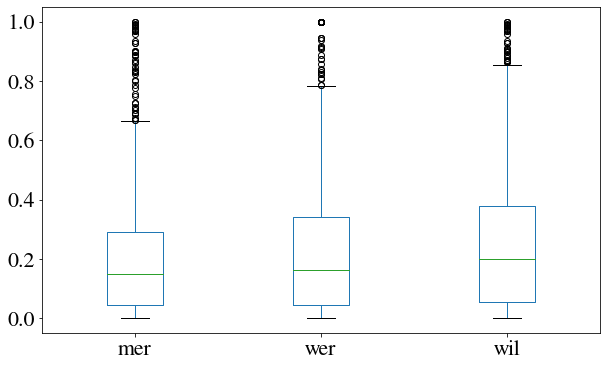

In [5]:
df[metrics].plot.box(figsize=(10, 6))

Text(0.5, 1.0, 'Word Information Lost (WIL)')

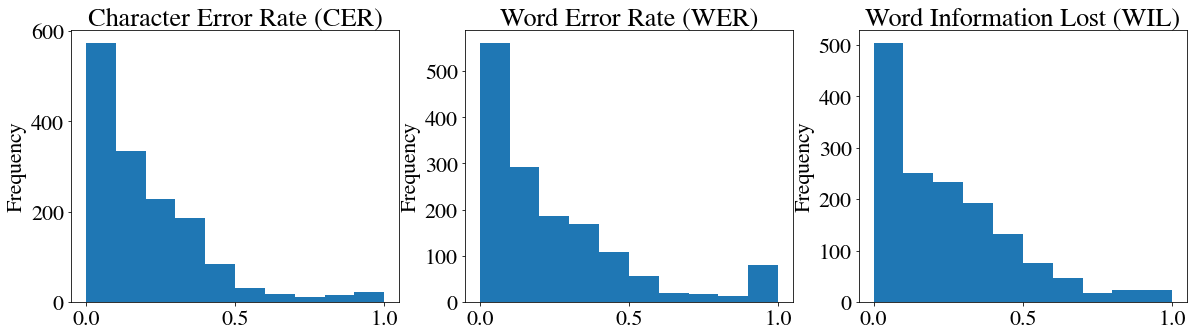

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

df['mer'].plot.hist(ax=axes[0])
df['wer'].plot.hist(ax=axes[1])
df['wil'].plot.hist(ax=axes[2])

axes[0].set_title('Character Error Rate (CER)')
axes[1].set_title('Word Error Rate (WER)')
axes[2].set_title('Word Information Lost (WIL)')

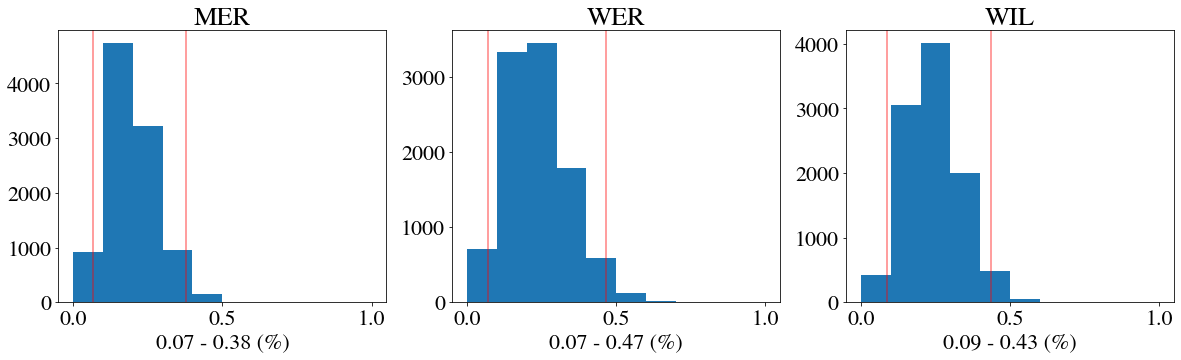

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, metric in enumerate(metrics):
    sample = []
    for _ in range(10000):
        bootstrap = np.random.choice(df[metric], 6, replace=True)
        sample.append(bootstrap.mean())

    inf, sup = np.percentile(sample, 2.5) , np.percentile(sample, 97.5)
    label = f"{round(inf, 2)} - {round(sup, 2)} (%)"
    
    axes[i].hist(sample, range=(0, 1))
    axes[i].axvline(inf, color='r', alpha=0.5)
    axes[i].axvline(sup, color='r', alpha=0.5)
    
    axes[i].set_xlabel(label);
    axes[i].set_title(metric.upper());


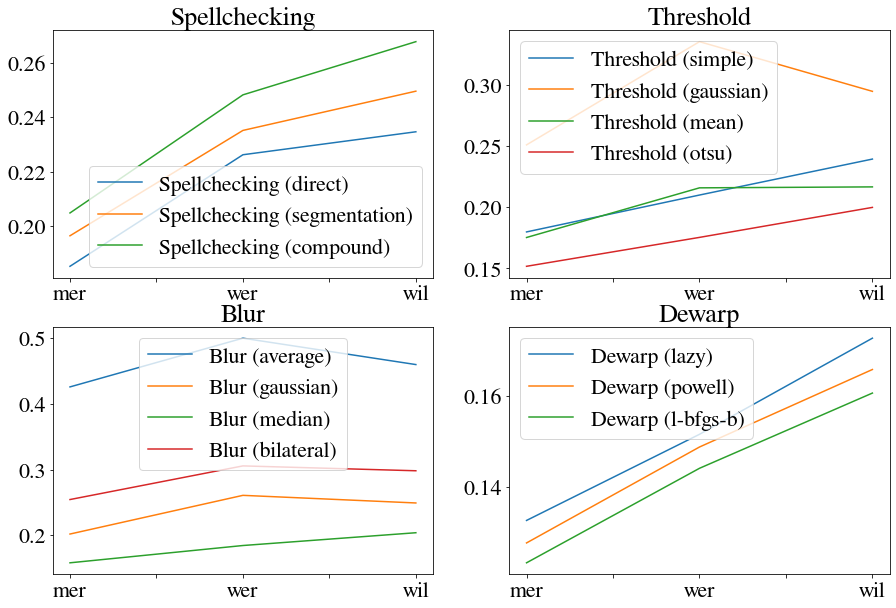

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(1, 4):
    df[metrics][i::15].mean().plot(ax=axes[0, 0])
    
for i in range(4, 8):
    df[metrics][i::15].mean().plot(ax=axes[0, 1])
    
for i in range(8, 12):
    df[metrics][i::15].mean().plot(ax=axes[1, 0])
    
for i in range(12, 15):
    df[metrics][i::15].mean().plot(ax=axes[1, 1])
    
axes[0, 0].set_title('Spellchecking')
axes[0, 1].set_title('Threshold')
axes[1, 0].set_title('Blur')
axes[1, 1].set_title('Dewarp')

axes[0, 0].legend(legends[1:4])
axes[0, 1].legend(legends[4:8])
axes[1, 0].legend(legends[8:12])
axes[1, 1].legend(legends[12:15])

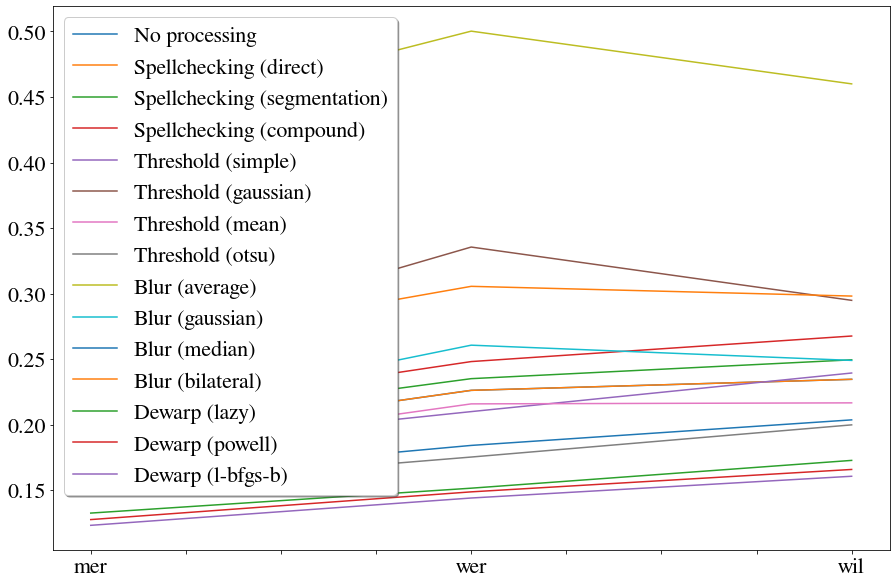

In [9]:
results = pd.DataFrame(columns=metrics_time)

for i in range(15):
    mean = df[metrics_time][i::15].mean().rename(legends[i])
    results = results.append(mean)
    mean[metrics].plot(figsize=(15, 10))
plt.legend(legends, fancybox=True, shadow=True)

# Final Results

In [10]:
filename2 = "../results/results2"
legends2 = ['Thresh (mean) + Blur (gaussian)', 'Thresh (mean) + Blur (median)', 'Thresh (otsu) + Blur (gaussian)',
            'Thresh (otsu) + Blur (median)', 'Thresh (mean) + Dewarp (lazy)', 'Thresh (mean) + Dewarp (powell)',
            'Thresh (mean) + Dewarp (l-bfgs-b)', 'Thresh (otsu) + Dewarp (lazy)', 'Thresh (otsu) + Dewarp (powell)',
            'Thresh (otsu) + Dewarp (l-bfgs-b)', 'Blur (gaussian) + Dewarp (lazy)', 'Blur (gaussian) + Dewarp (powell)',
            'Blur (gaussian) + Dewarp (l-bfgs-b)', 'Blur (median) + Dewarp (lazy)', 'Blur (median) + Dewarp (powell)',
            'Blur (median) + Dewarp (l-bfgs-b)', 'Thresh (mean) + Blur (gaussian) + Dewarp (lazy)',
            'Thresh (mean) + Blur (gaussian) + Dewarp (powell)', 'Thresh (mean) + Blur (gaussian) + Dewarp (l-bfgs-b)',
            'Thresh (mean) + Blur (median) + Dewarp (lazy)', 'Thresh (mean) + Blur (median) + Dewarp (powell)',
            'Thresh (mean) + Blur (median) + Dewarp (l-bfgs-b)', 'Thresh (otsu) + Blur (gaussian) + Dewarp (lazy)',
            'Thresh (otsu) + Blur (gaussian) + Dewarp (powell)', 'Thresh (otsu) + Blur (gaussian) + Dewarp (l-bfgs-b)',
            'Thresh (otsu) + Blur (median) + Dewarp (lazy)', 'Thresh (otsu) + Blur (median) + Dewarp (powell)',
            'Thresh (otsu) + Blur (median) + Dewarp (l-bfgs-b)']


In [11]:
df2 = pd.read_csv(filename2, names=columns, index_col=False)
df2.loc[df2.wer > 1, 'wer'] = 1

<AxesSubplot:>

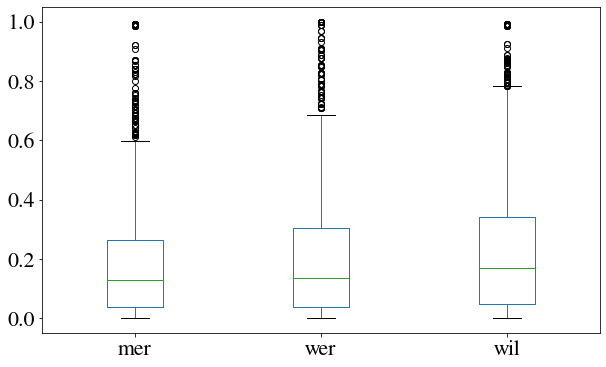

In [12]:
df2[metrics].plot.box(figsize=(10, 6))

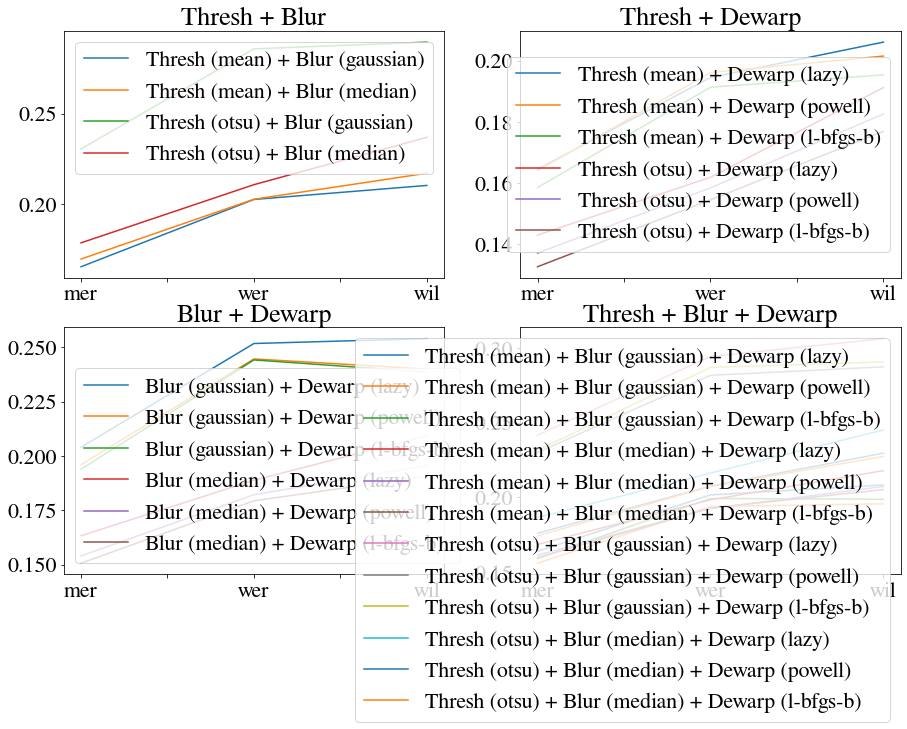

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(4):
    df2[metrics][i::28].mean().plot(ax=axes[0, 0])
    
for i in range(4, 10):
    df2[metrics][i::28].mean().plot(ax=axes[0, 1])
    
for i in range(10, 16):
    df2[metrics][i::28].mean().plot(ax=axes[1, 0])
    
for i in range(16, 28):
    df2[metrics][i::28].mean().plot(ax=axes[1, 1])
    
axes[0, 0].set_title('Thresh + Blur')
axes[0, 1].set_title('Thresh + Dewarp')
axes[1, 0].set_title('Blur + Dewarp')
axes[1, 1].set_title('Thresh + Blur + Dewarp')

axes[0, 0].legend(legends2[:4])
axes[0, 1].legend(legends2[4:10])
axes[1, 0].legend(legends2[10:16])
axes[1, 1].legend(legends2[16:28])

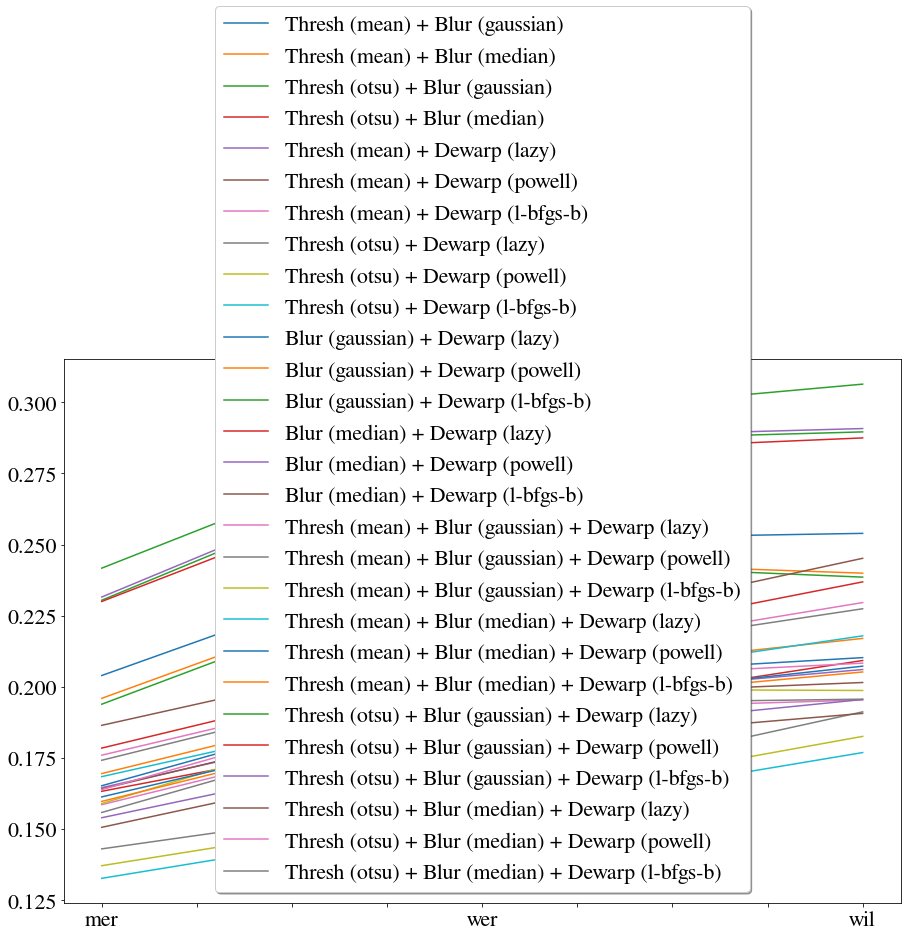

In [14]:
results2 = pd.DataFrame(columns=metrics_time)

for i in range(28):
    mean = df2[metrics_time][i::28].mean().rename(legends2[i])
    results2 = results2.append(mean)
    mean[metrics].plot(figsize=(15, 10))
plt.legend(legends2, fancybox=True, shadow=True)

Text(0.5, 1.0, 'Word Information Lost (WIL)')

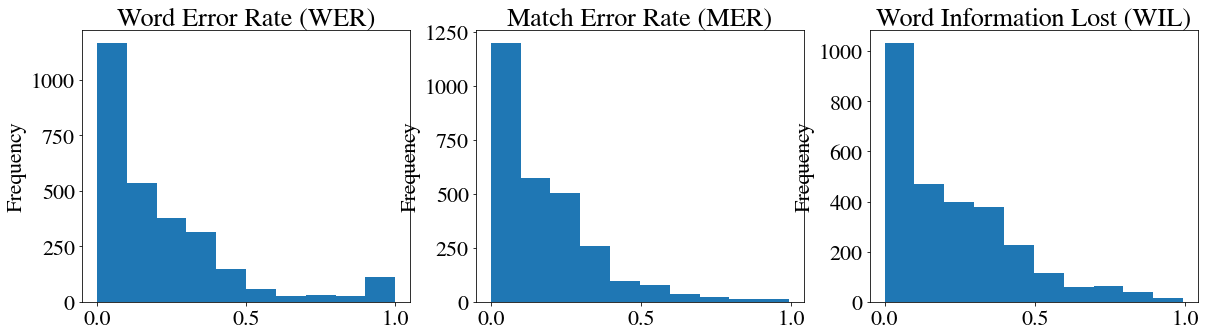

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

df2['wer'].plot.hist(ax=axes[0])
df2['mer'].plot.hist(ax=axes[1])
df2['wil'].plot.hist(ax=axes[2])

axes[0].set_title('Word Error Rate (WER)')
axes[1].set_title('Match Error Rate (MER)')
axes[2].set_title('Word Information Lost (WIL)')


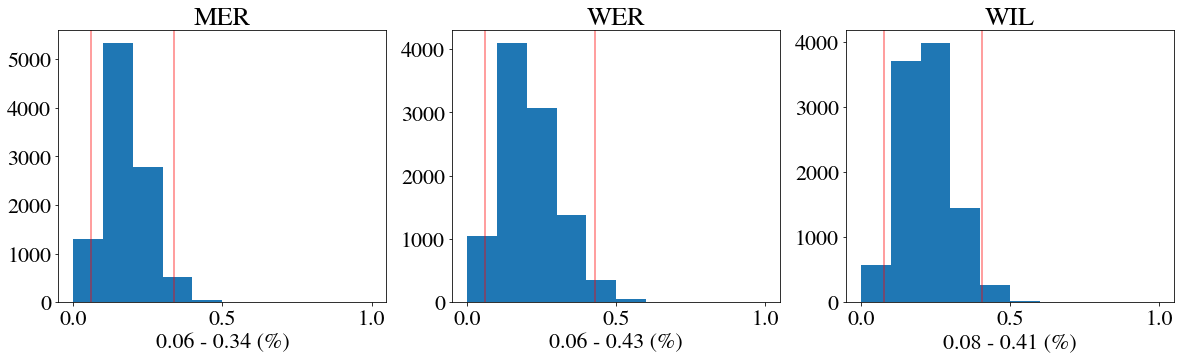

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, metric in enumerate(metrics):
    sample = []
    for _ in range(10000):
        bootstrap = np.random.choice(df2[metric], 6, replace=True)
        sample.append(bootstrap.mean())

    inf, sup = np.percentile(sample, 2.5) , np.percentile(sample, 97.5)
    label = f"{round(inf, 2)} - {round(sup, 2)} (%)"
    
    axes[i].hist(sample, range=(0, 1))
    axes[i].axvline(inf, color='r', alpha=0.5)
    axes[i].axvline(sup, color='r', alpha=0.5)
    
    axes[i].set_xlabel(label);
    axes[i].set_title(metric.upper());

In [17]:
filename3 = "../results/results3"
legends3 = ['Thresh (global) + Blur (gaussian)', 'Thresh (global) + Blur (median)', 'Thresh (otsu) + Blur (gaussian)',
            'Thresh (otsu) + Blur (median)', 'Thresh (global) + Dewarp (lazy)', 'Thresh (global) + Dewarp (powell)',
            'Thresh (global) + Dewarp (l-bfgs-b)', 'Thresh (otsu) + Dewarp (lazy)', 'Thresh (otsu) + Dewarp (powell)',
            'Thresh (otsu) + Dewarp (l-bfgs-b)', 'Blur (gaussian) + Dewarp (lazy)', 'Blur (gaussian) + Dewarp (powell)',
            'Blur (gaussian) + Dewarp (l-bfgs-b)', 'Blur (median) + Dewarp (lazy)', 'Blur (median) + Dewarp (powell)',
            'Blur (median) + Dewarp (l-bfgs-b)', 'Thresh (global) + Blur (gaussian) + Dewarp (lazy)',
            'Thresh (global) + Blur (gaussian) + Dewarp (powell)', 'Thresh (global) + Blur (gaussian) + Dewarp (l-bfgs-b)',
            'Thresh (global) + Blur (median) + Dewarp (lazy)', 'Thresh (global) + Blur (median) + Dewarp (powell)',
            'Thresh (global) + Blur (median) + Dewarp (l-bfgs-b)', 'Thresh (otsu) + Blur (gaussian) + Dewarp (lazy)',
            'Thresh (otsu) + Blur (gaussian) + Dewarp (powell)', 'Thresh (otsu) + Blur (gaussian) + Dewarp (l-bfgs-b)',
            'Thresh (otsu) + Blur (median) + Dewarp (lazy)', 'Thresh (otsu) + Blur (median) + Dewarp (powell)',
            'Thresh (otsu) + Blur (median) + Dewarp (l-bfgs-b)']

In [18]:
df3 = pd.read_csv(filename3, names=columns, index_col=False)
df3.loc[df3.wer > 1, 'wer'] = 1

<AxesSubplot:>

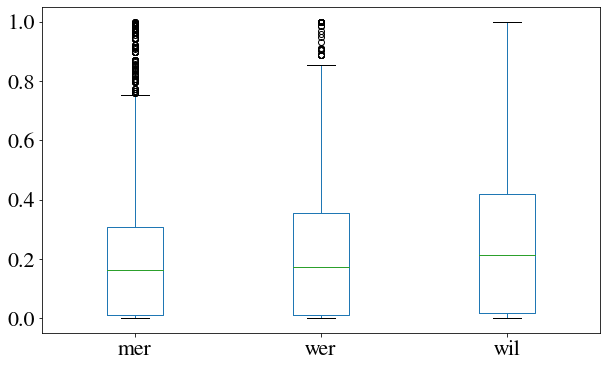

In [19]:
df3[metrics].plot.box(figsize=(10, 6))

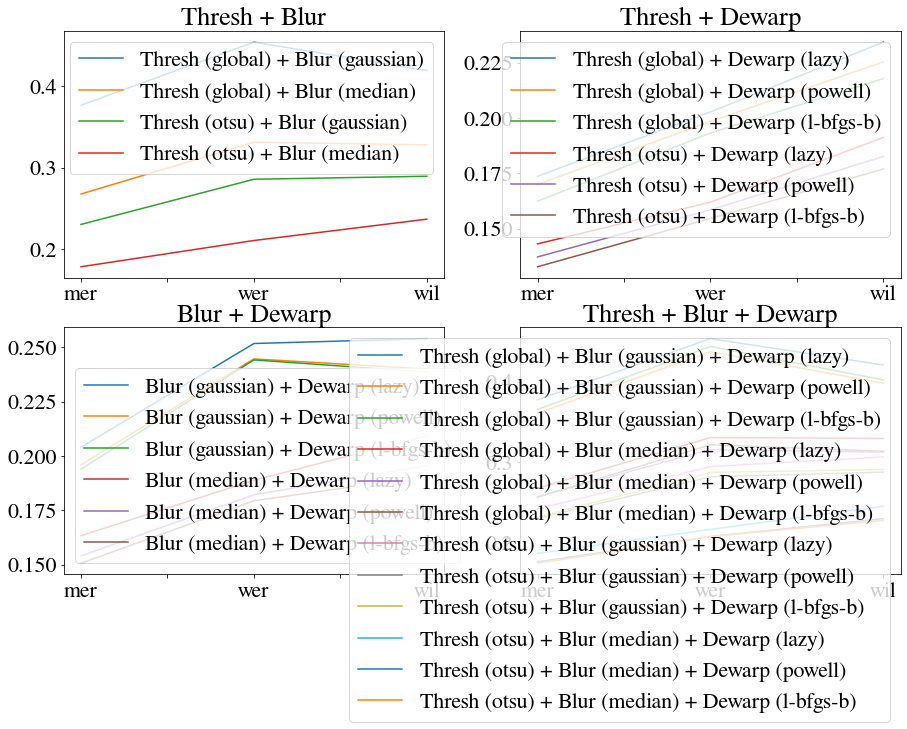

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(4):
    df3[metrics][i::28].mean().plot(ax=axes[0, 0])
    
for i in range(4, 10):
    df3[metrics][i::28].mean().plot(ax=axes[0, 1])
    
for i in range(10, 16):
    df3[metrics][i::28].mean().plot(ax=axes[1, 0])
    
for i in range(16, 28):
    df3[metrics][i::28].mean().plot(ax=axes[1, 1])
    
axes[0, 0].set_title('Thresh + Blur')
axes[0, 1].set_title('Thresh + Dewarp')
axes[1, 0].set_title('Blur + Dewarp')
axes[1, 1].set_title('Thresh + Blur + Dewarp')

axes[0, 0].legend(legends3[:4])
axes[0, 1].legend(legends3[4:10])
axes[1, 0].legend(legends3[10:16])
axes[1, 1].legend(legends3[16:28])

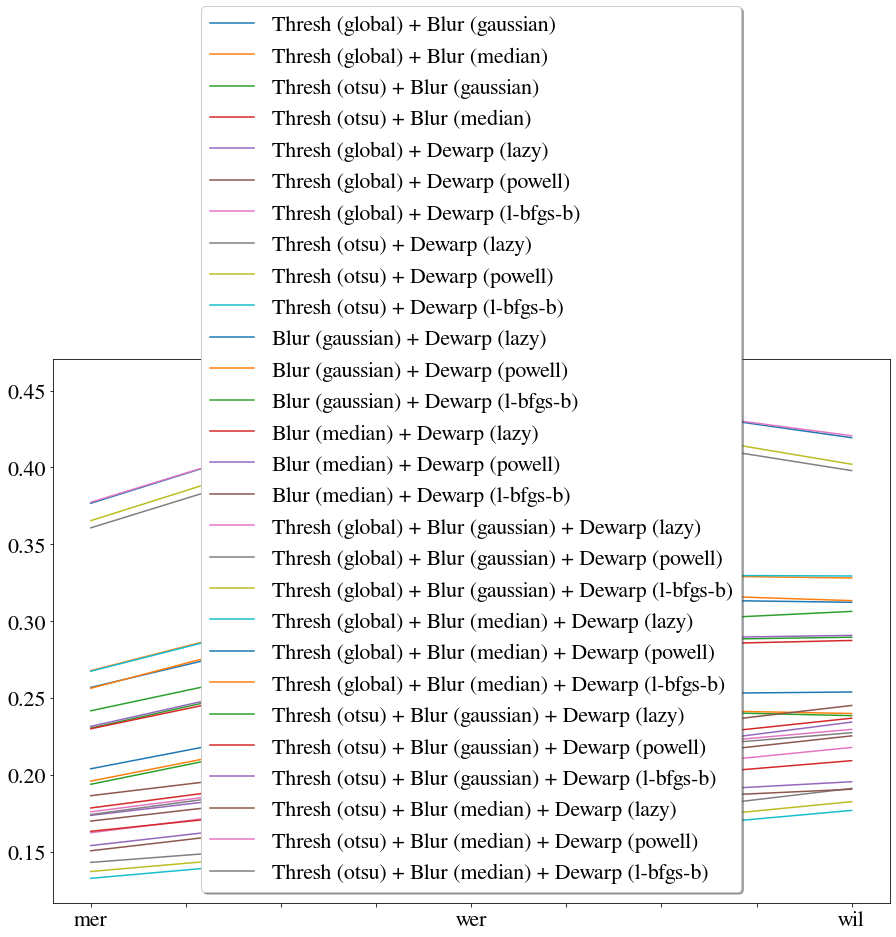

In [21]:
results3 = pd.DataFrame(columns=metrics_time)

for i in range(28):
    mean = df3[metrics_time][i::28].mean().rename(legends3[i])
    results3 = results3.append(mean)
    mean[metrics].plot(figsize=(15, 10))
plt.legend(legends3, fancybox=True, shadow=True)

Text(0.5, 1.0, 'Word Information Lost (WIL)')

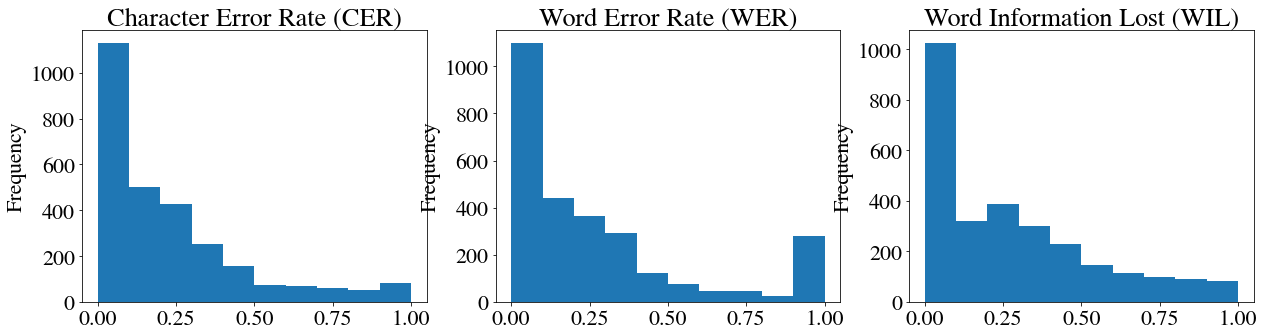

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(21, 5))

df3['mer'].plot.hist(ax=axes[0])
df3['wer'].plot.hist(ax=axes[1])
df3['wil'].plot.hist(ax=axes[2])

axes[0].set_title('Character Error Rate (CER)')
axes[1].set_title('Word Error Rate (WER)')
axes[2].set_title('Word Information Lost (WIL)')

Text(0.5, 1.0, 'Word Information Lost (WIL)')

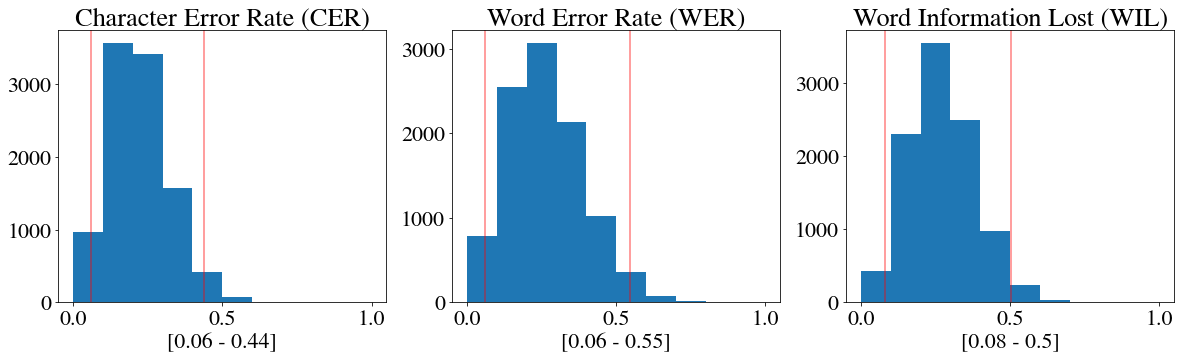

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, metric in enumerate(metrics):
    sample = []
    for _ in range(10000):
        bootstrap = np.random.choice(df3[metric], 6, replace=True)
        sample.append(bootstrap.mean())

    inf, sup = np.percentile(sample, 2.5) , np.percentile(sample, 97.5)
    label = f"[{round(inf, 2)} - {round(sup, 2)}]"
    
    axes[i].hist(sample, range=(0, 1))
    axes[i].axvline(inf, color='r', alpha=0.5)
    axes[i].axvline(sup, color='r', alpha=0.5)
    axes[i].set_xlabel(label);
    
axes[0].set_title('Character Error Rate (CER)')
axes[1].set_title('Word Error Rate (WER)')
axes[2].set_title('Word Information Lost (WIL)')


In [24]:
results

,mer,wer,wil,time
No processing,0.185330,0.226208,0.234623,4.412001
Spellchecking (direct),0.185330,0.226208,0.234623,6.623613
Spellchecking (segmentation),0.196513,0.235121,0.249504,7.545576
Spellchecking (compound),0.204877,0.248157,0.267646,10.249377
Threshold (simple),0.179808,0.209989,0.239432,3.773782
Threshold (gaussian),0.251051,0.335522,0.294870,11.266695
Threshold (mean),0.175243,0.215886,0.216664,9.364835
Threshold (otsu),0.151675,0.175329,0.199875,3.936637
Blur (average),0.425957,0.500221,0.459999,4.157694
Blur (gaussian),0.201702,0.260668,0.249051,5.207639


In [25]:
results2

,mer,wer,wil,time
Thresh (mean) + Blur (gaussian),0.165247,0.202499,0.210265,6.818271
Thresh (mean) + Blur (median),0.169508,0.202610,0.217013,6.887166
Thresh (otsu) + Blur (gaussian),0.230431,0.285878,0.289591,3.584614
Thresh (otsu) + Blur (median),0.178472,0.210686,0.236878,3.780539
Thresh (mean) + Dewarp (lazy),0.164570,0.194523,0.206077,8.785942
Thresh (mean) + Dewarp (powell),0.164127,0.196129,0.201521,14.033896
Thresh (mean) + Dewarp (l-bfgs-b),0.158584,0.191341,0.195390,9.472495
Thresh (otsu) + Dewarp (lazy),0.143054,0.161923,0.191215,4.132682
Thresh (otsu) + Dewarp (powell),0.137148,0.158469,0.182589,9.418234
Thresh (otsu) + Dewarp (l-bfgs-b),0.132704,0.154563,0.176902,4.826073


In [26]:
results3

,mer,wer,wil,time
Thresh (global) + Blur (gaussian),0.376712,0.454232,0.419401,3.114003
Thresh (global) + Blur (median),0.267805,0.331317,0.328113,3.537774
Thresh (otsu) + Blur (gaussian),0.230431,0.285878,0.289591,3.584916
Thresh (otsu) + Blur (median),0.178472,0.210686,0.236878,3.778990
Thresh (global) + Dewarp (lazy),0.173653,0.202748,0.234346,3.977306
Thresh (global) + Dewarp (powell),0.169947,0.198465,0.225397,9.245332
Thresh (global) + Dewarp (l-bfgs-b),0.162380,0.193234,0.217862,4.677523
Thresh (otsu) + Dewarp (lazy),0.143054,0.161923,0.191215,4.130153
Thresh (otsu) + Dewarp (powell),0.137148,0.158469,0.182589,9.414457
Thresh (otsu) + Dewarp (l-bfgs-b),0.132704,0.154563,0.176902,4.825217


### L-BFGS-B results

Text(0.5, 1.0, 'Word Information Lost (WIL)')

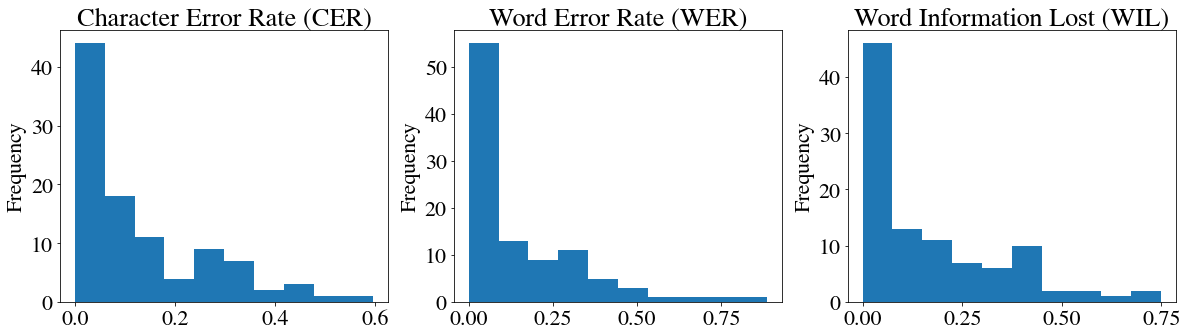

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, metric in enumerate(metrics):
    df[metric][14::15].plot.hist(ax=axes[i])

axes[0].set_title('Character Error Rate (CER)')
axes[1].set_title('Word Error Rate (WER)')
axes[2].set_title('Word Information Lost (WIL)')

Text(0.5, 1.0, 'Word Information Lost (WIL)')

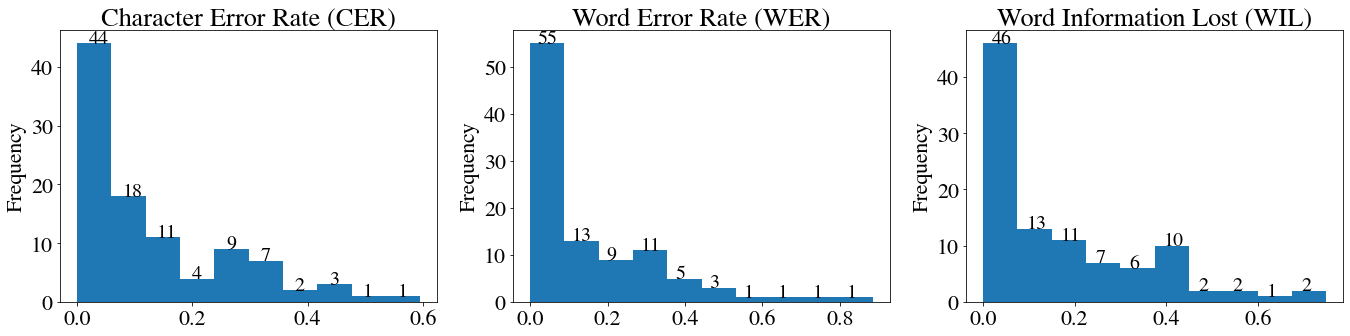

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(23, 5))

for i, metric in enumerate(metrics):
    df[metric][14::15].plot.hist(ax=axes[i])
    min_ylim, max_ylim = plt.ylim()
    count, division = np.histogram(df[metric][14::15])
    for j in range(len(count)):
        axes[i].text(division[j] + 0.02, count[j] + 0.1, count[j], fontsize=20)


axes[0].set_title('Character Error Rate (CER)')
axes[1].set_title('Word Error Rate (WER)')
axes[2].set_title('Word Information Lost (WIL)')


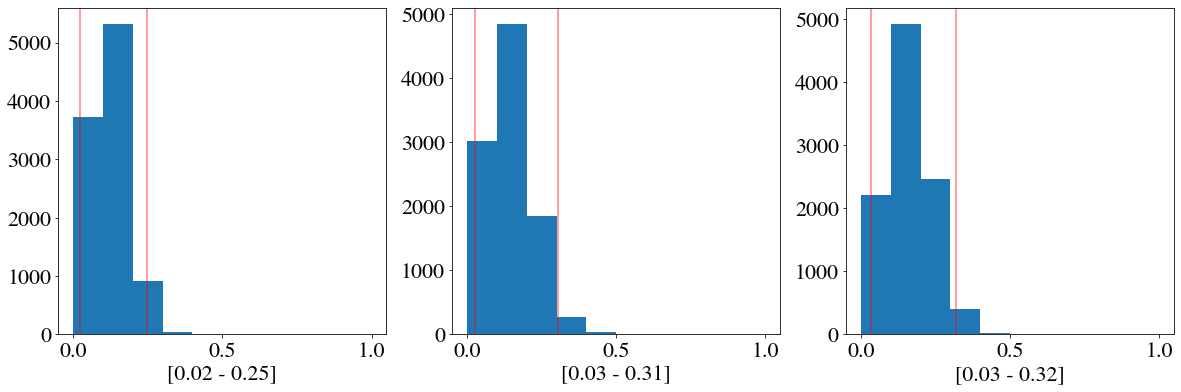

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, metric in enumerate(metrics):
    sample = []
    for _ in range(10000):
        bootstrap = np.random.choice(df[metric][14::15], 6, replace=True)
        sample.append(bootstrap.mean())

    inf, sup = np.percentile(sample, 2.5) , np.percentile(sample, 97.5)
    label = f"[{round(inf, 2)} - {round(sup, 2)}]"
    
    axes[i].hist(sample, range=(0, 1))
    axes[i].axvline(inf, color='r', alpha=0.5)
    axes[i].axvline(sup, color='r', alpha=0.5)
    
    axes[i].set_xlabel(label);
    
# axes[0].set_title('Character Error Rate (CER)')
# axes[1].set_title('Word Error Rate (WER)')
# axes[2].set_title('Word Information Lost (WIL)')


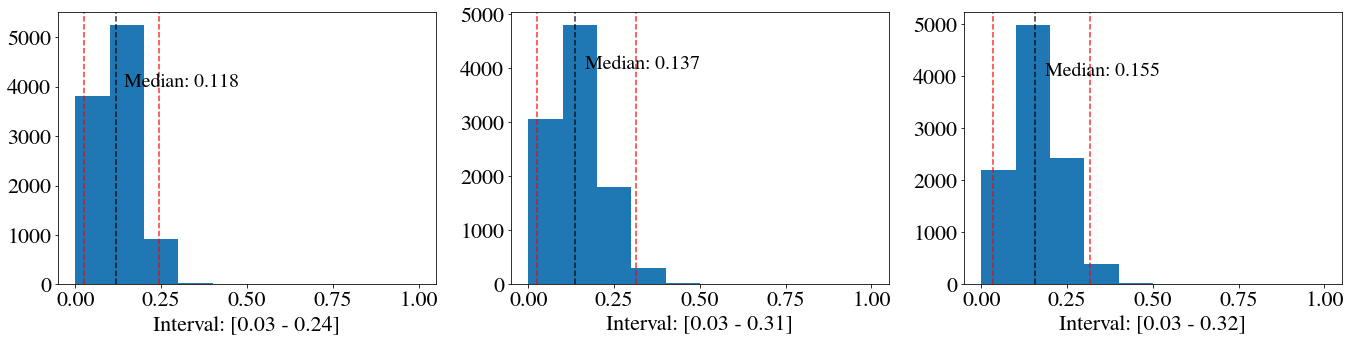

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(23, 5))

for i, metric in enumerate(metrics):
    sample = []
    for _ in range(10000):
        bootstrap = np.random.choice(df[metric][14::15], 6, replace=True)
        sample.append(bootstrap.mean())
    
    quant = np.quantile(sample, 0.5)
    min_ylim, max_ylim = plt.ylim()
    
    inf, sup = np.percentile(sample, 2.5) , np.percentile(sample, 97.5)
    label = f"Interval: [{round(inf, 2)} - {round(sup, 2)}]"
    
    axes[i].hist(sample, range=(0, 1))
    axes[i].axvline(inf, color='r', alpha=0.8, linestyle='--')
    axes[i].axvline(sup, color='r', alpha=0.8, linestyle='--')
    axes[i].axvline(quant, color='k', alpha=0.8, linestyle='--')
    axes[i].text(quant*1.2, 4000, 'Median: {:.3f}'.format(quant), fontsize=20)

    
    axes[i].set_xlabel(label)
    
# axes[0].set_title('Character Error Rate (CER)')
# axes[1].set_title('Word Error Rate (WER)')
# axes[2].set_title('Word Information Lost (WIL)')


### Confusion Matrix

<AxesSubplot:>

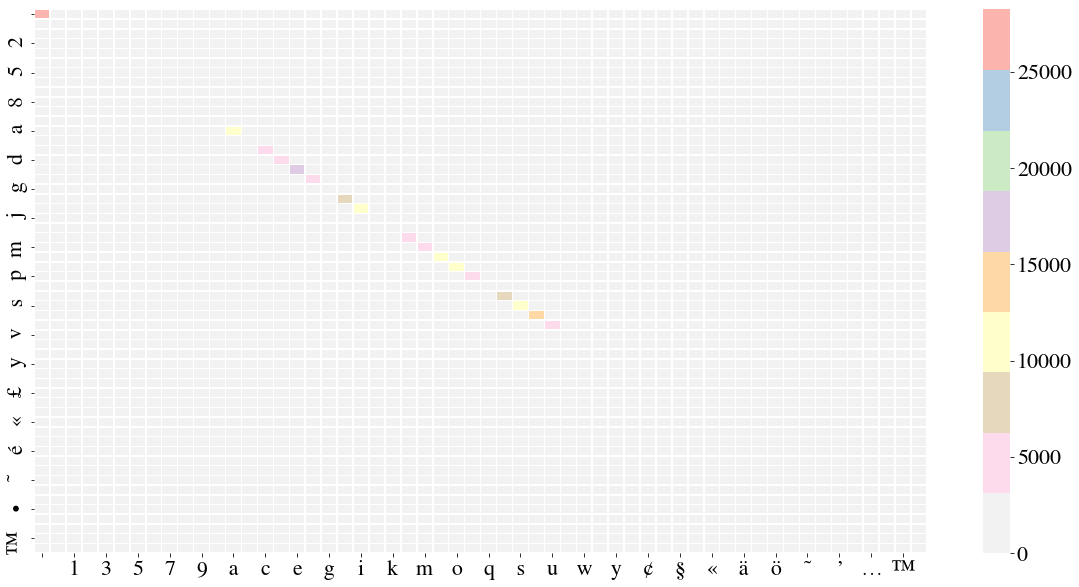

In [31]:
import string

matrix_path = "../results/conf_matrix.csv"
cmatrix = pd.read_csv(matrix_path, index_col=0)
plt.figure(figsize=(20, 10))
sn.heatmap(cmatrix, cmap="Pastel1_r", linewidths=0.5)

<AxesSubplot:>

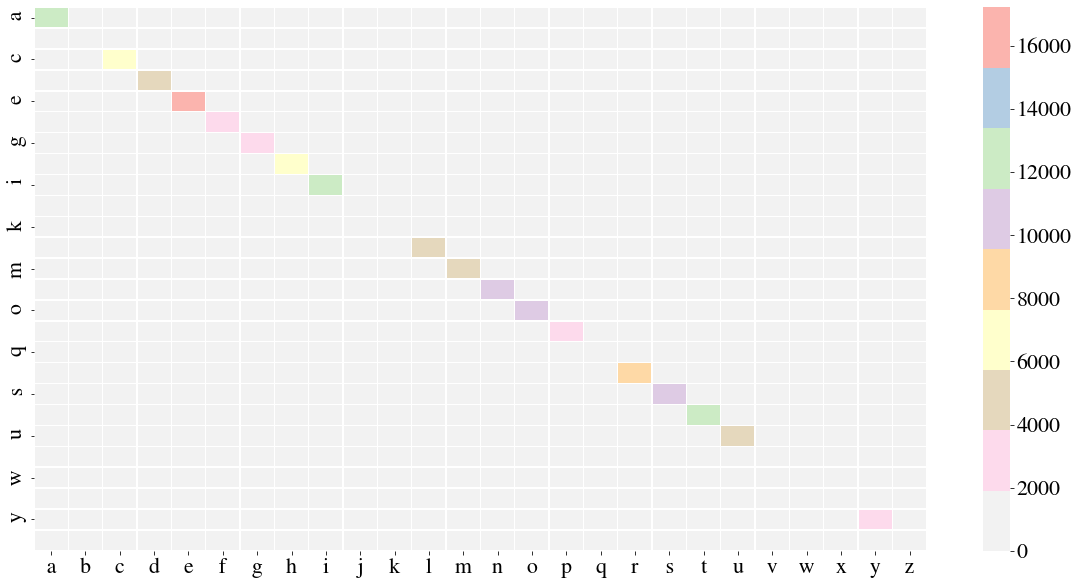

In [32]:
plt.figure(figsize=(20, 10))
alpha = cmatrix[cmatrix.columns.intersection(list(string.ascii_lowercase))][12:38]
alpha_norm = (alpha - alpha.mean()) / (alpha.max() - alpha.min())
alpha_norm2 = (cmatrix - alpha.mean()) / alpha.std()
sn.heatmap(alpha, cmap="Pastel1_r", linewidths=0.5)

In [33]:
alpha_norm

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
a,0.960825,-0.036828,-0.037864,-0.037193,-0.037557,-0.037303,-0.036631,-0.038088,-0.037075,0.153846,...,-0.025954,-0.037853,-0.037221,-0.038122,-0.036706,-0.038462,-0.038355,-0.035150,-0.037245,-0.032589
b,-0.038750,0.960263,-0.038555,-0.039298,-0.038893,-0.039041,-0.039952,-0.039013,-0.038877,-0.046154,...,-0.042214,-0.039008,-0.038973,-0.038579,-0.039035,-0.039932,-0.039466,-0.041773,-0.039756,-0.041571
c,-0.038409,-0.038573,0.960582,-0.038070,-0.038834,-0.038172,-0.039214,-0.038396,-0.038468,-0.046154,...,-0.042214,-0.038315,-0.038251,-0.038122,-0.039035,-0.037726,-0.038911,-0.038462,-0.037245,-0.035583
d,-0.038664,-0.039155,-0.037864,0.960526,-0.038254,-0.038462,-0.038107,-0.038242,-0.037813,-0.046154,...,-0.017824,-0.038777,-0.038148,-0.037438,-0.038802,-0.036991,-0.036687,-0.038462,-0.037245,-0.041571
e,-0.036367,-0.037410,-0.034755,-0.038070,0.960875,-0.036434,-0.034417,-0.038088,-0.037075,-0.046154,...,-0.042214,-0.038199,-0.036500,-0.037362,-0.035075,-0.036991,-0.036131,-0.035150,-0.038249,-0.035583
f,-0.038835,-0.039155,-0.039418,-0.038947,-0.038312,0.960380,-0.038845,-0.038242,-0.038795,-0.046154,...,-0.042214,-0.038430,-0.038355,-0.038579,-0.038802,-0.039197,-0.040022,-0.041773,-0.039254,-0.041571
g,-0.039090,-0.039155,-0.038382,-0.038947,-0.038660,-0.037882,0.960048,-0.038859,-0.038795,-0.046154,...,-0.042214,-0.039008,-0.038767,-0.038426,-0.039268,-0.039197,-0.038911,-0.041773,-0.038249,-0.038577
h,-0.038579,-0.036828,-0.038900,-0.037719,-0.038544,-0.037882,-0.037369,0.960678,-0.037976,-0.046154,...,-0.034084,-0.037275,-0.038045,-0.038350,-0.038569,-0.036256,-0.038355,-0.035150,-0.038751,-0.041571
i,-0.036622,-0.037410,-0.038382,-0.037544,-0.037557,-0.038751,-0.039214,-0.036699,0.960713,-0.046154,...,-0.042214,-0.037622,-0.038458,-0.037894,-0.035774,-0.037726,-0.034464,-0.031839,-0.035738,-0.038577
j,-0.039175,-0.039737,-0.039418,-0.039474,-0.039125,-0.039620,-0.039952,-0.039322,-0.039287,0.953846,...,-0.042214,-0.039355,-0.039179,-0.039187,-0.039501,-0.039932,-0.040022,-0.041773,-0.039756,-0.041571


In [34]:
pd.Series(np.diag(cmatrix), index=[cmatrix.index, cmatrix.columns])

        28235.0
0  0      157.0
1  1      907.0
2  2      277.0
3  3      118.0
4  4       98.0
5  5      193.0
6  6        8.0
7  7        0.0
8  8       21.0
9  9      713.0
_  _        0.0
a  a    11752.0
b  b     1719.0
c  c     5790.0
d  d     5700.0
e  e    17223.0
f  f     3453.0
g  g     2710.0
h  h     6482.0
i  i    12209.0
j  j        5.0
k  k      598.0
l  l     5345.0
m  m     3910.0
n  n    11244.0
o  o    10694.0
p  p     3280.0
q  q      123.0
r  r     8655.0
s  s     9704.0
t  t    13152.0
u  u     4293.0
v  v     1360.0
w  w     1799.0
x  x      302.0
y  y     1991.0
z  z      334.0
¢  ¢        0.0
£  £        0.0
§  §        1.0
©  ©        0.0
«  «        1.0
»  »        1.0
ä  ä        0.0
é  é        0.0
ö  ö        0.0
ü  ü        0.0
˜  ˜        0.0
–  –        0.0
’  ’       18.0
•  •        0.0
…  …        0.0
€  €        0.0
™  ™        0.0
ﬁ  ﬁ        1.0
dtype: float64